# **Facebook Page Data Analytics Project**

This project will explore the Facebook Page of my shop [Handmade Herbal Soap](https://www.facebook.com/revigoreessentials).

In this project I will analyze the metrics from my FB page and answer some questions like:



1.   What is the average Page Visit, Like and Reach with and without Paid Ads?
2.   How does the Paid Ads affect the overall page performance?
3.   How does Paid Ads affect the Shopee Sales?
4.   Does the Paid Ads affect overall Shopee Store traffic and does it funnel sales to the Store?

This are the questions that I'm going to answer for this analysis. And after this I will try to analyze the performance of my store based on this two analyses: Shopee and FB Page and create a report for it later on.

Again, I will not post the dataset for this project since it's my business' personal dataset.

## Import libraries needed for the analysis.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## I will now load the dataset for analysis using the Pandas Library.

In [48]:
fb = pd.read_csv('/content/drive/MyDrive/Shoppee Data/Dataset/Facebook Page Total Metrics.csv')
fb.head()

,Date,Facebook Page Visits,New Facebook Page likes,Facebook reach,"IMPRESSION,UNIQUE_USERS","SPEND,COUNT",Sales (Shopee),Quantity Sold (Shopee)
0,2021-01-09T00:00:00,0,0,0,0,0.0,0,0
1,2021-01-10T00:00:00,0,0,0,0,0.0,2300,64
2,2021-01-11T00:00:00,0,0,0,0,0.0,150,3
3,2021-01-12T00:00:00,0,0,0,0,0.0,0,0
4,2021-01-13T00:00:00,0,0,0,0,0.0,100,2


## Now I will try to get an overall feel of the data using the describe() function of the DataFrame.

In [49]:
fb.describe()

,Facebook Page Visits,New Facebook Page likes,Facebook reach,"IMPRESSION,UNIQUE_USERS","SPEND,COUNT",Sales (Shopee),Quantity Sold (Shopee)
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,1.215325,0.099903,146.462658,167.229874,5.123919,579.723569,11.553831
std,3.636679,0.741757,883.303870,909.998932,27.055665,967.301135,24.115595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
50%,0.000000,0.000000,3.000000,0.000000,0.000000,300.000000,5.000000
75%,1.000000,0.000000,6.000000,0.000000,0.000000,700.000000,12.000000
max,65.000000,19.000000,6858.000000,6872.000000,257.890000,15000.000000,500.000000


Here are some key points to the data.

* The population size of the data is 1031 rows meaning it recorded 1031 days.

**Facebook Page Visit**
* The mean Facebook Page Visit is 1.22 with a standard deviation of 3.64 visits.
* The lowest number of visits is 0 and the highest is 65 for one day.

**New Facebook Page Likes**
* The mean likes is 0.099 Likes per day with a standard deviation of 0.74 likes.
* The highest page like in one day is 19 and the lowest is 0.

**Facebook Reach**
* The mean reach per day is 146.46 people and the standard deviation is 883.30.
* The highest number of people reached in a single day is 6858 people and the lowest is 0.

**Spending**
* The mean spend per day is 5.12 pesos
* The highest amount spent in one day of ads is 257.89 pesos.

**Sales**
* The average sale per day is 579.72 pesos
* The median sale per day is 300.00 pesos


## Now I will answer the First Question in my Analysis, to do so I will have to divide my data into two: with_ads and without_ads.


In [50]:
fb.columns

Index(['Date', 'Facebook Page Visits', 'New Facebook Page likes',
       'Facebook reach', 'IMPRESSION,UNIQUE_USERS', 'SPEND,COUNT',
       'Sales (Shopee)', 'Quantity Sold (Shopee)'],
      dtype='object')

In [51]:
with_ads = fb[fb['SPEND,COUNT'] > 0]
with_ads.head()

,Date,Facebook Page Visits,New Facebook Page likes,Facebook reach,"IMPRESSION,UNIQUE_USERS","SPEND,COUNT",Sales (Shopee),Quantity Sold (Shopee)
228,2021-08-25T00:00:00,0,0,0,1220,33.64,0,0
229,2021-08-26T00:00:00,0,0,0,2656,95.17,386,8
230,2021-08-27T00:00:00,0,0,0,2931,94.95,496,5
231,2021-08-28T00:00:00,0,0,0,3162,98.99,235,5
232,2021-08-29T00:00:00,0,0,0,3632,107.97,141,3


In [52]:
with_ads.shape

(43, 8)

In [53]:
without_ads = fb[fb['SPEND,COUNT'] == 0]
without_ads.head()

,Date,Facebook Page Visits,New Facebook Page likes,Facebook reach,"IMPRESSION,UNIQUE_USERS","SPEND,COUNT",Sales (Shopee),Quantity Sold (Shopee)
0,2021-01-09T00:00:00,0,0,0,0,0.0,0,0
1,2021-01-10T00:00:00,0,0,0,0,0.0,2300,64
2,2021-01-11T00:00:00,0,0,0,0,0.0,150,3
3,2021-01-12T00:00:00,0,0,0,0,0.0,0,0
4,2021-01-13T00:00:00,0,0,0,0,0.0,100,2


In [54]:
without_ads.shape

(988, 8)

### Here we can see that the days without the Paid Ads far outweighs the days with the Paid Ads. Now I will check the descriptive statistics for each data to see what is happening for those days.

In [55]:
with_ads.describe()

,Facebook Page Visits,New Facebook Page likes,Facebook reach,"IMPRESSION,UNIQUE_USERS","SPEND,COUNT",Sales (Shopee),Quantity Sold (Shopee)
count,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000
mean,9.697674,1.372093,3355.00000,4009.627907,122.854884,1017.395349,23.488372
std,12.356866,3.251544,2849.85612,2129.485652,56.066463,1131.908084,31.264137
min,0.000000,0.000000,0.00000,15.000000,1.670000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,2507.500000,82.625000,327.000000,6.000000
50%,7.000000,0.000000,5131.00000,5106.000000,145.890000,630.000000,12.000000
75%,14.000000,1.000000,5997.50000,5864.000000,151.665000,1281.500000,26.500000
max,65.000000,19.000000,6858.00000,6872.000000,257.890000,5950.000000,162.000000


In [56]:
without_ads.describe()

,Facebook Page Visits,New Facebook Page likes,Facebook reach,"IMPRESSION,UNIQUE_USERS","SPEND,COUNT",Sales (Shopee),Quantity Sold (Shopee)
count,988.000000,988.000000,988.000000,988.0,988.0,988.000000,988.000000
mean,0.846154,0.044534,6.819838,0.0,0.0,560.675101,11.034413
std,2.008244,0.225166,24.308385,0.0,0.0,955.618558,23.639577
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.0,0.0,300.000000,5.000000
75%,1.000000,0.000000,6.000000,0.0,0.0,680.000000,12.000000
max,17.000000,2.000000,450.000000,0.0,0.0,15000.000000,500.000000


### As seen in the descriptive statistics for both, the days with the Paid Ads generally has a higher data for all the columns for both tables. Although if you look at the population sizes of both, without ads data has a substantially bigger count compared to the data with paid ads. In order to see if it is really so I'll will do analysis for both datas and see if they are statistically different.

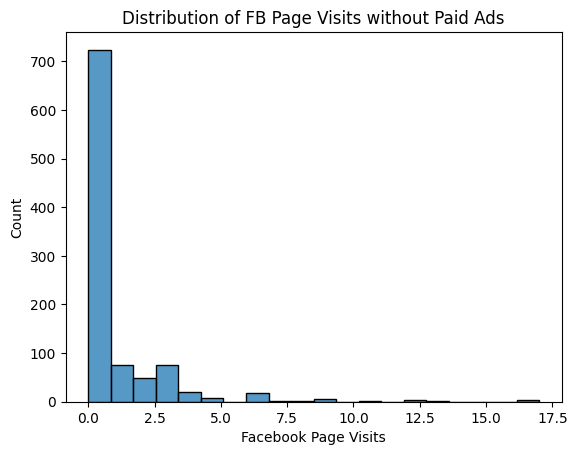

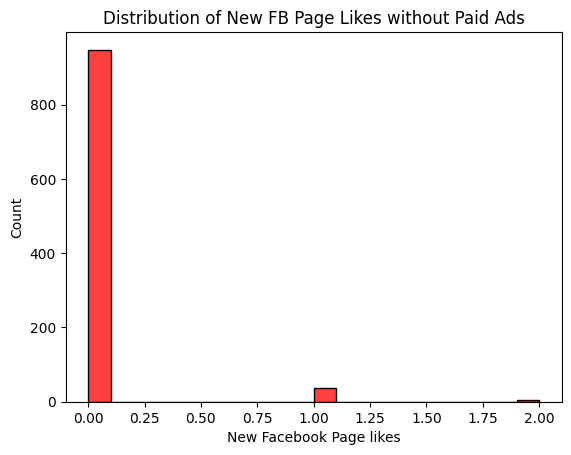

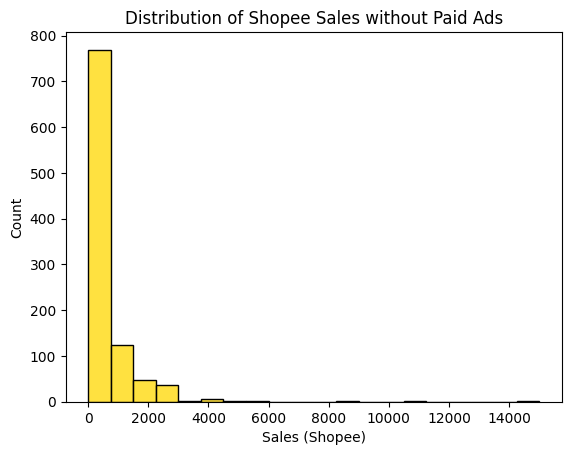

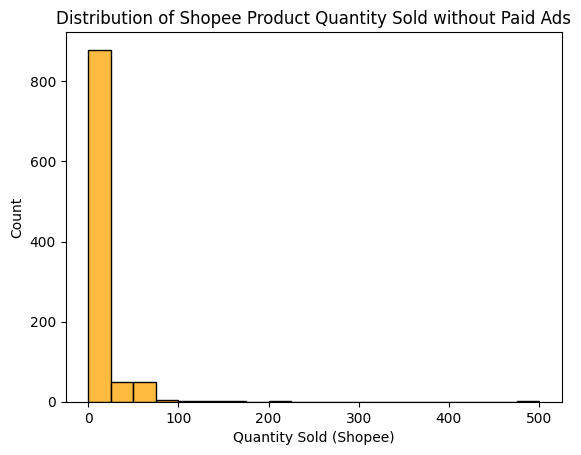

In [57]:
sns.histplot(without_ads['Facebook Page Visits'], bins=20)
plt.title('Distribution of FB Page Visits without Paid Ads')
plt.show()

sns.histplot(without_ads['New Facebook Page likes'], bins=20, color='red')
plt.title('Distribution of New FB Page Likes without Paid Ads')
plt.show()

sns.histplot(without_ads['Sales (Shopee)'], bins=20, color='gold')
plt.title('Distribution of Shopee Sales without Paid Ads')
plt.show()

sns.histplot(without_ads['Quantity Sold (Shopee)'], bins=20, color='orange')
plt.title('Distribution of Shopee Product Quantity Sold without Paid Ads')
plt.show()

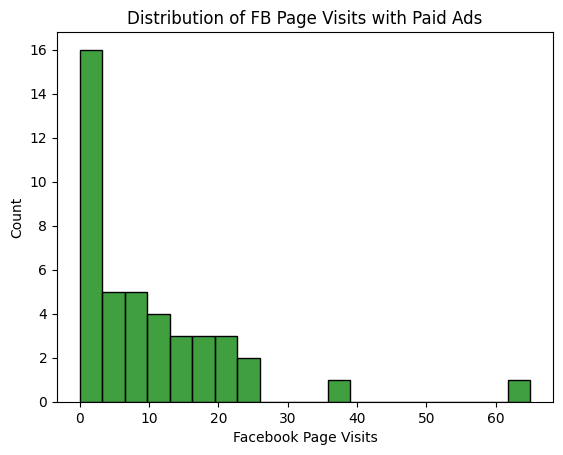

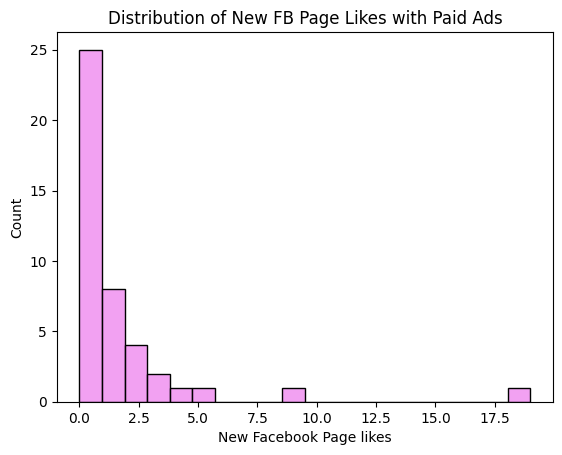

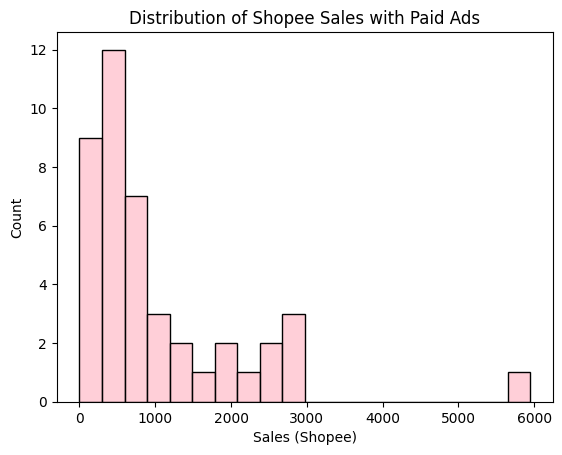

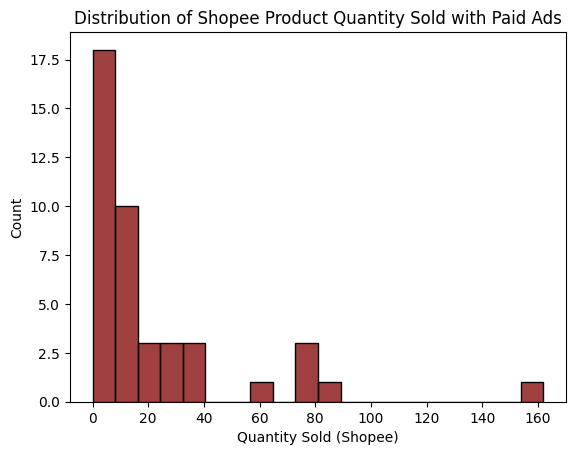

In [58]:
sns.histplot(with_ads['Facebook Page Visits'], bins=20, color = 'green')
plt.title('Distribution of FB Page Visits with Paid Ads')
plt.show()

sns.histplot(with_ads['New Facebook Page likes'], bins=20, color='violet')
plt.title('Distribution of New FB Page Likes with Paid Ads')
plt.show()

sns.histplot(with_ads['Sales (Shopee)'], bins=20, color='pink')
plt.title('Distribution of Shopee Sales with Paid Ads')
plt.show()

sns.histplot(with_ads['Quantity Sold (Shopee)'], bins=20, color='maroon')
plt.title('Distribution of Shopee Product Quantity Sold with Paid Ads')
plt.show()

[]

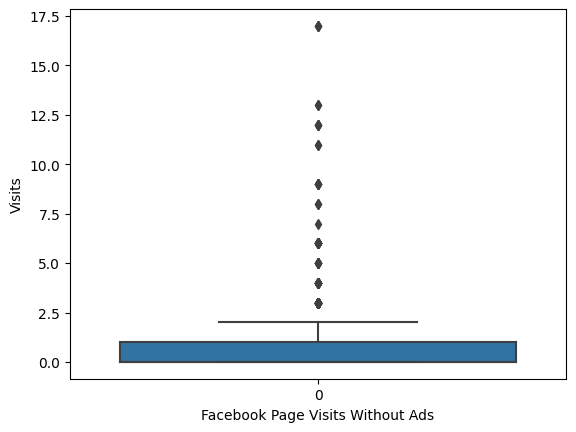

In [59]:
sns.boxplot(without_ads['Facebook Page Visits'])
plt.xlabel('Facebook Page Visits Without Ads')
plt.ylabel('Visits')
plt.plot()

[]

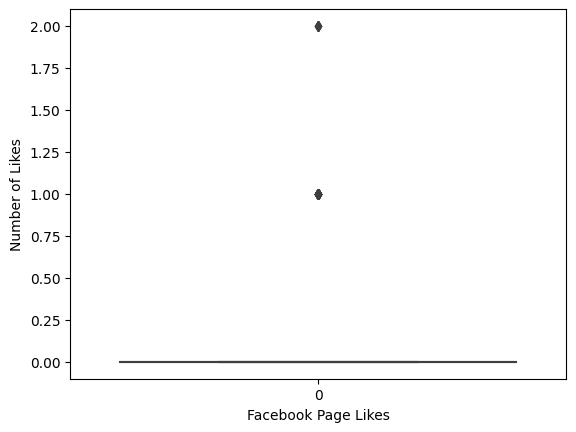

In [60]:
sns.boxplot(without_ads['New Facebook Page likes'])
plt.xlabel('Facebook Page Likes')
plt.ylabel('Number of Likes')
plt.plot()

[]

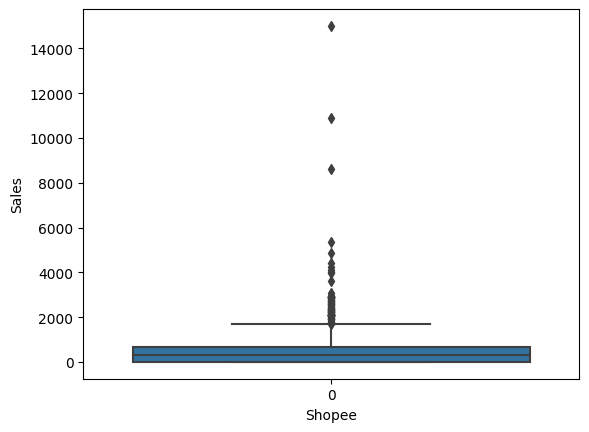

In [61]:
sns.boxplot(without_ads['Sales (Shopee)'])
plt.xlabel('Shopee')
plt.ylabel('Sales')
plt.plot()

[]

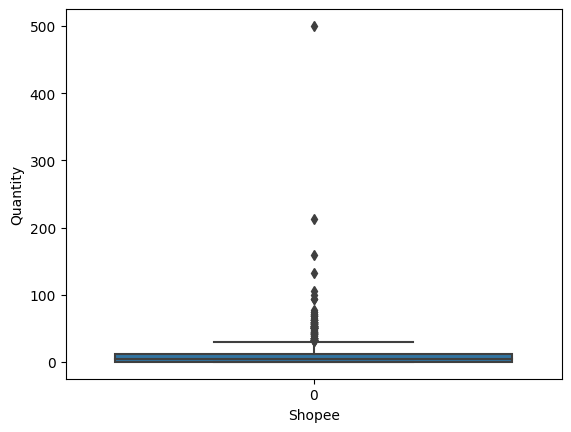

In [62]:
sns.boxplot(without_ads['Quantity Sold (Shopee)'])
plt.xlabel('Shopee')
plt.ylabel('Quantity')
plt.plot()

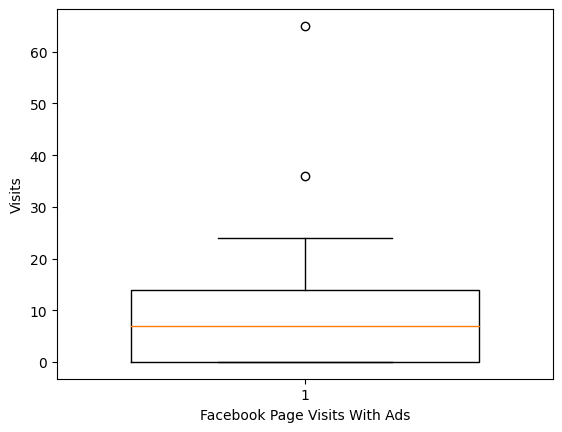

In [63]:
plt.boxplot(with_ads['Facebook Page Visits'], widths = 0.7)
plt.xlabel('Facebook Page Visits With Ads')
plt.ylabel('Visits')
plt.show()

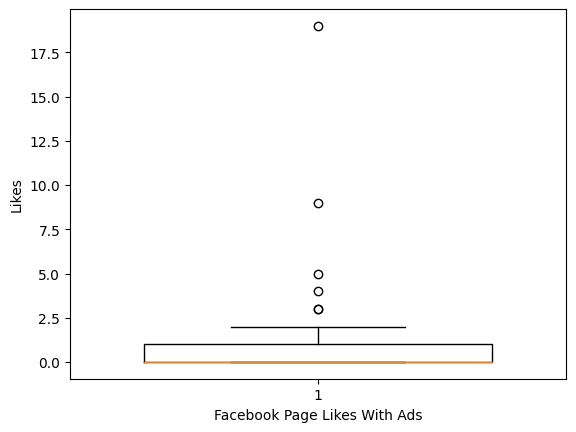

In [64]:
plt.boxplot(with_ads['New Facebook Page likes'], widths = .7)
plt.xlabel('Facebook Page Likes With Ads')
plt.ylabel('Likes')
plt.show()

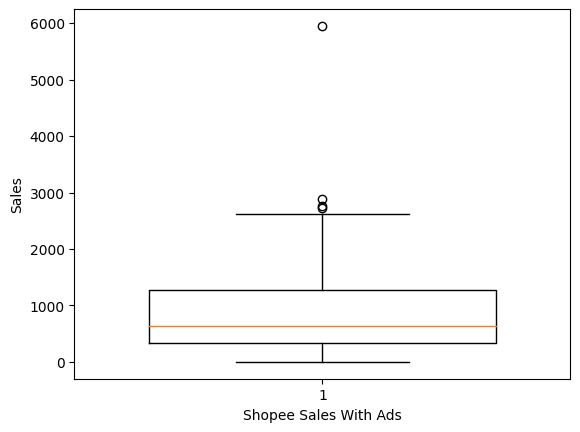

In [65]:
plt.boxplot(with_ads['Sales (Shopee)'], widths = .7)
plt.xlabel('Shopee Sales With Ads')
plt.ylabel('Sales')
plt.show()

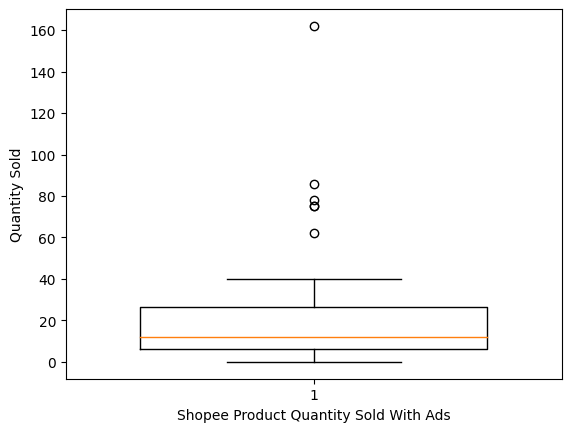

In [66]:
plt.boxplot(with_ads['Quantity Sold (Shopee)'], widths = .7)
plt.xlabel('Shopee Product Quantity Sold With Ads')
plt.ylabel('Quantity Sold')
plt.show()

### Based on the graph comparisons for the data with the Paid ads and the data without the ads, both of them are skewed to the right. With a lot of outliers to the data. So for this I will use a non-parametric test, using Mann Whitney U test. Since the sample sizes of the two datas are extremely uneven, I will also do bootstrapping which I will resample the larger population (without ads) and do analysis with that also and compare the results of both analysis.


In [67]:
#import mann whitney u
from scipy.stats import mannwhitneyu

In [68]:
columns_to_be_analyzed =['Facebook Page Visits', 'New Facebook Page likes', 'Sales (Shopee)', 'Quantity Sold (Shopee)']

In [69]:
results = {'Result': ['Statistics', 'p-value']}
for column in columns_to_be_analyzed:
  stat, p = mannwhitneyu(np.array(without_ads[column]), np.array(with_ads[column]), alternative='two-sided')
  results[column] = [stat, p]

re = pd.DataFrame(results)
re.set_index('Result', inplace = True)

re

,Facebook Page Visits,New Facebook Page likes,Sales (Shopee),Quantity Sold (Shopee)
Result,,,,
Statistics,1.035300e+04,1.303400e+04,13224.500000,12240.000000
p-value,6.931503e-13,5.568485e-27,0.000024,0.000002


### Based on this analysis, all the metrics that I've tested for the days with Paid Ads and the days without Paid Ads are statistically different. So it means that Facebook Page Visits,	New Facebook Page likes,	Sales (Shopee),	Quantity Sold (Shopee) are statistically higher when we do paid ads to the Facebook Page.

#### I will now also do bootstrapping to really confirm if this is really the case for these metrics.

In [70]:
def bootstrap(dataset, columns_to_be_analyzed, iterations=1000):
    stats_results = {column: [] for column in columns_to_be_analyzed}
    p_value_results = {column: [] for column in columns_to_be_analyzed}

    for _ in range(iterations):
        sampled_data = dataset.sample(n=50, replace=True)  # Adjust the sample size as needed
        for column in columns_to_be_analyzed:
            stat, p = mannwhitneyu(sampled_data[column], with_ads[column], alternative='two-sided')
            stats_results[column].append(stat)
            p_value_results[column].append(p)

    return stats_results, p_value_results


def results_to_dataframe(stats_results, p_value_results):
    combined_results = []
    for i in range(len(next(iter(stats_results.values())))):
        iteration_result = {}
        for column in stats_results:
            iteration_result[f"{column}_stat"] = stats_results[column][i]
            iteration_result[f"{column}_p_value"] = p_value_results[column][i]
        combined_results.append(iteration_result)

    results_df = pd.DataFrame(combined_results)
    return results_df

bootstrap_stats, bootstrap_p_values = bootstrap(without_ads, columns_to_be_analyzed, iterations=1000)
results_df = results_to_dataframe(bootstrap_stats, bootstrap_p_values)


In [71]:
results_df.head()

,Facebook Page Visits_stat,Facebook Page Visits_p_value,New Facebook Page likes_stat,New Facebook Page likes_p_value,Sales (Shopee)_stat,Sales (Shopee)_p_value,Quantity Sold (Shopee)_stat,Quantity Sold (Shopee)_p_value
0,548.0,1.120365e-05,664.0,0.000011,562.5,0.000075,509.5,0.000012
1,509.0,1.378109e-06,658.0,0.000008,719.0,0.006110,670.0,0.001793
2,501.5,8.472030e-07,674.5,0.000025,697.5,0.003599,630.5,0.000601
3,541.0,7.654949e-06,641.5,0.000002,654.0,0.001136,617.5,0.000402
4,537.5,5.198092e-06,664.0,0.000011,820.5,0.050120,735.5,0.008869


In [72]:
results_df.describe()

,Facebook Page Visits_stat,Facebook Page Visits_p_value,New Facebook Page likes_stat,New Facebook Page likes_p_value,Sales (Shopee)_stat,Sales (Shopee)_p_value,Quantity Sold (Shopee)_stat,Quantity Sold (Shopee)_p_value
count,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.00000,1.000000e+03,1000.000000,1.000000e+03
mean,523.552500,9.429429e-06,660.260500,3.136325e-05,673.93400,1.162454e-02,624.369500,4.179593e-03
std,32.359784,2.180815e-05,22.865251,8.374992e-05,89.97337,3.672173e-02,87.248656,1.718188e-02
min,433.000000,3.794308e-09,625.000000,4.995314e-07,375.00000,5.895369e-08,333.500000,9.066350e-09
25%,502.000000,7.402274e-07,641.500000,2.126166e-06,608.37500,3.157283e-04,562.000000,7.449773e-05
50%,521.750000,2.389490e-06,658.000000,7.756090e-06,674.00000,1.999792e-03,624.500000,5.075049e-04
75%,545.000000,8.169136e-06,674.500000,2.477927e-05,735.00000,8.779053e-03,685.000000,2.644784e-03
max,630.500000,2.784080e-04,746.500000,1.162788e-03,1038.00000,7.783714e-01,967.500000,4.091529e-01


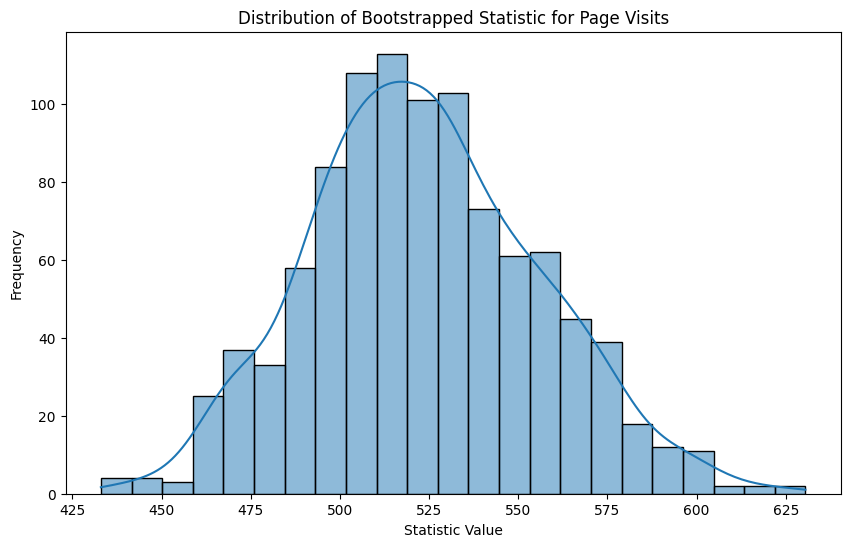

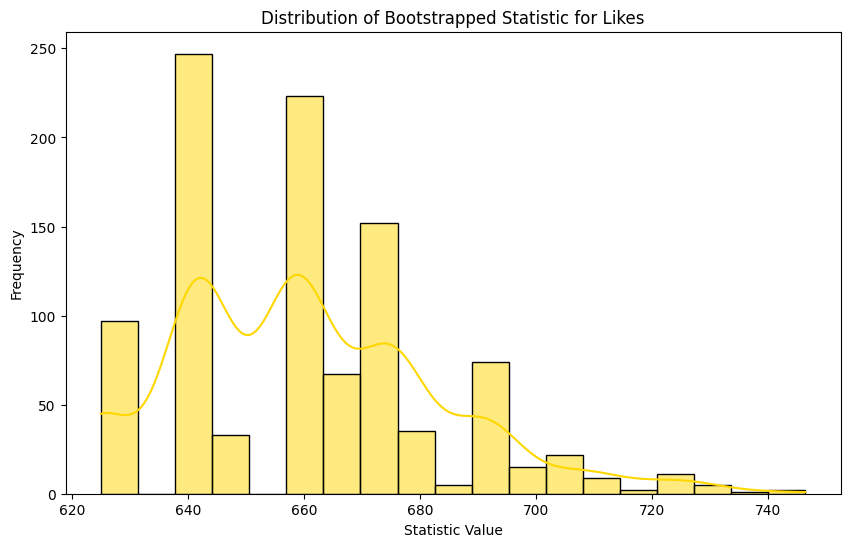

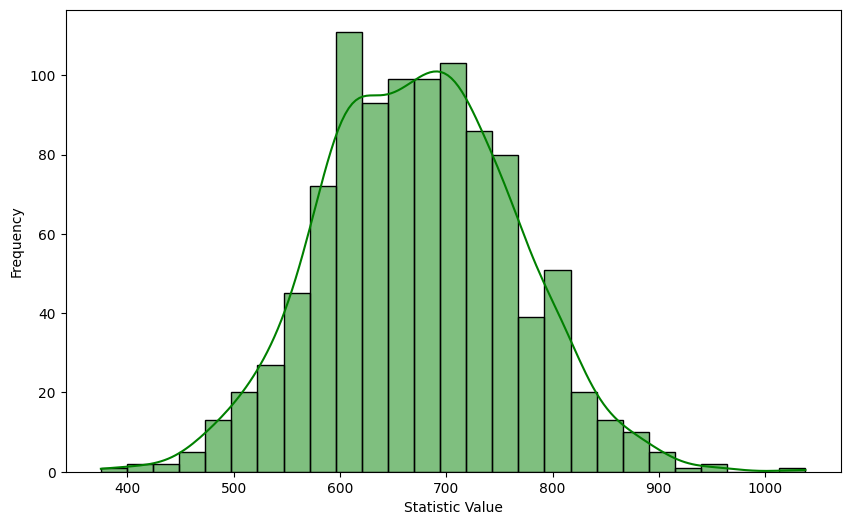

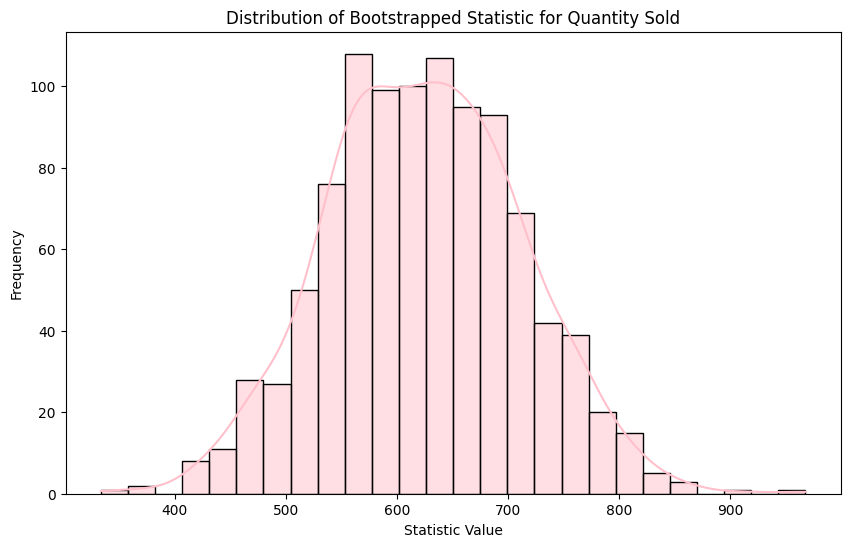

In [81]:
# Histogram for a bootstrapped statistic]
plt.figure(figsize=(10, 6))
sns.histplot(results_df['Facebook Page Visits_stat'], kde=True)
plt.title('Distribution of Bootstrapped Statistic for Page Visits')
plt.xlabel('Statistic Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(results_df['New Facebook Page likes_stat'], kde=True, color = 'gold')
plt.title('Distribution of Bootstrapped Statistic for Likes')
plt.xlabel('Statistic Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(results_df['Sales (Shopee)_stat'], kde=True, color='green')
plt.xlabel('Statistic Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(results_df['Quantity Sold (Shopee)_stat'], kde=True, color='pink')
plt.title('Distribution of Bootstrapped Statistic for Quantity Sold')
plt.xlabel('Statistic Value')
plt.ylabel('Frequency')
plt.show()

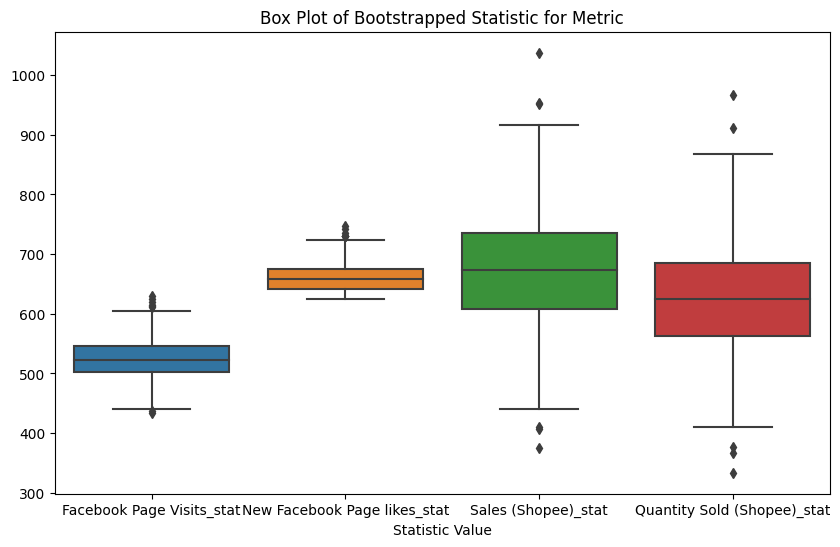

In [74]:
# Box Plot for the same statistic
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df[['Facebook Page Visits_stat', 'New Facebook Page likes_stat', 'Sales (Shopee)_stat', 'Quantity Sold (Shopee)_stat']])  # Replace 'metric_name_stat' with your actual column name
plt.title('Box Plot of Bootstrapped Statistic for Metric')
plt.xlabel('Statistic Value')
plt.show()

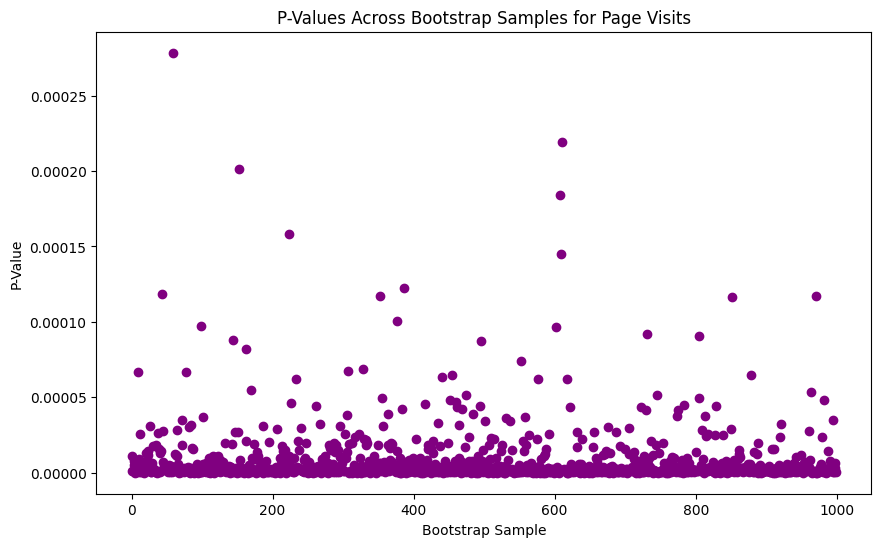

In [79]:
# Scatter Plot for p-values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(results_df)), results_df['Facebook Page Visits_p_value'], color='purple')
plt.title('P-Values Across Bootstrap Samples for Page Visits')
plt.xlabel('Bootstrap Sample')
plt.ylabel('P-Value')
plt.show()

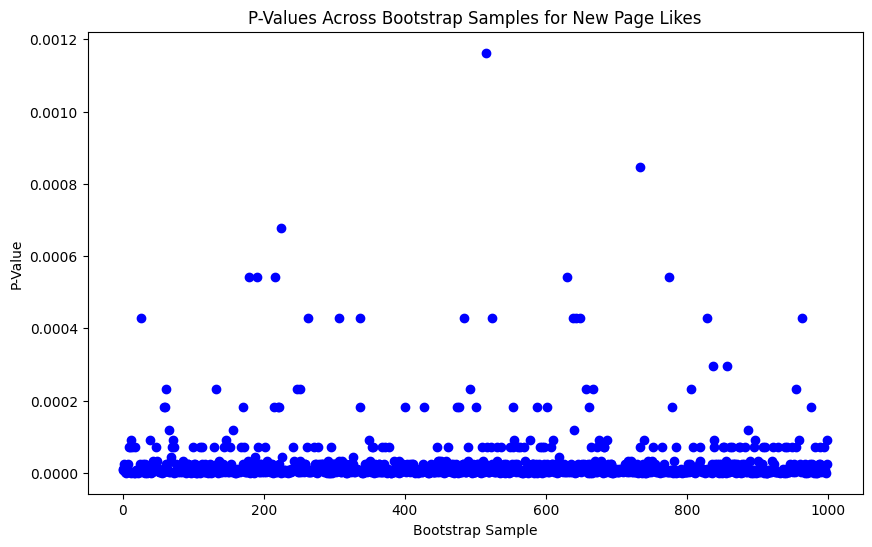

In [85]:
# Scatter Plot for p-values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(results_df)), results_df['New Facebook Page likes_p_value'], color='blue')
plt.title('P-Values Across Bootstrap Samples for New Page Likes')
plt.xlabel('Bootstrap Sample')
plt.ylabel('P-Value')
plt.show()

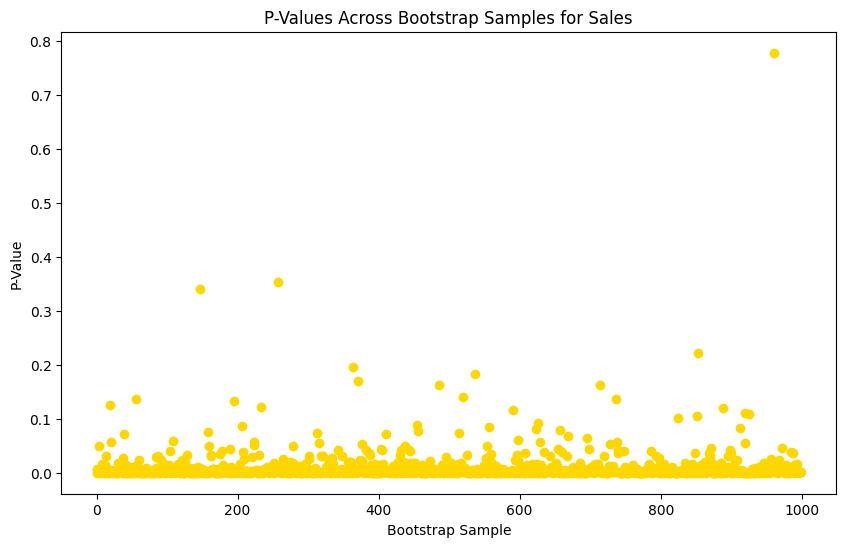

In [90]:
# Scatter Plot for p-values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(results_df)), results_df['Sales (Shopee)_p_value'], color='gold')
plt.title('P-Values Across Bootstrap Samples for Sales')
plt.xlabel('Bootstrap Sample')
plt.ylabel('P-Value')
plt.show()

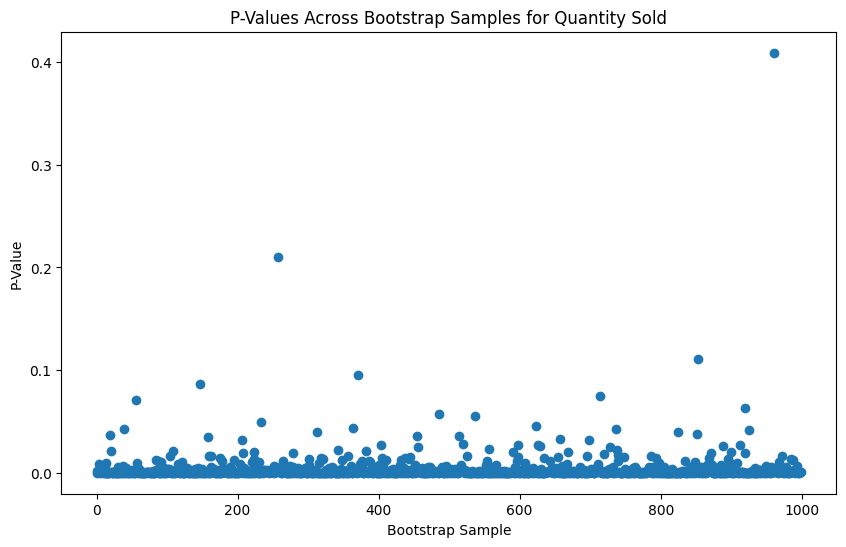

In [92]:
# Scatter Plot for p-values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(results_df)), results_df['Quantity Sold (Shopee)_p_value'])
plt.title('P-Values Across Bootstrap Samples for Quantity Sold')
plt.xlabel('Bootstrap Sample')
plt.ylabel('P-Value')
plt.show()

The Bootstrap method showed that the Facebook Ads really drove the increase in sales for the Shopee store its a method that's a bit like running many simulations to predict what could happen with our metrics when compared. I resampled the 'without ads' 1000 times to see if the difference of the sales is just a fluke considering there is a large difference with the population of the data. This showed that:

* The average sales from all these simulations came out to around 674, which gives a ballpark figure to expect in the future. The simulations also showed that the sales could vary quite a bit, from as low as around 375 in some cases to as high as about 1038 in others. But most of the time, the sales would be somewhere between 608 to 735, which is a more common range to see for the sales.

* Now, the p-value part, which might sound a bit technical, is actually just a way to measure if the increase in sales is for real or fluke. And since our p-value is 0.0116, which is below the usual cutoff of 0.05, it looks like the sales figures we're getting aren't just random. It suggests that there's a real pattern here, possibly showing that the strategies I'm applying, like the Facebook ads, are actually making a difference in sales.

* As for the other parts it just shows what the mean metric would be if We were running the Facebook ads for the soap and as for their p-values. It shows that the Facebook ads are actually making a difference in all of them.

This information is very insightful as to whether I should run another Facebook Ad again to increase traffic and drive new customers to try the products.

I will consider this very carefully and plan what kind of Paid Ad will be effective for the Shop.


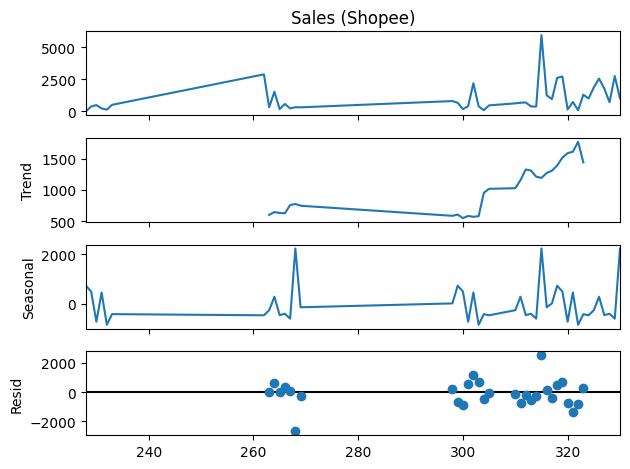

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(with_ads['Sales (Shopee)'], model='additive', period=15)
result.plot()
plt.show()

I just did a seasonal decomposition on the sales of Dataset of With Paid Promotions. And I showed some seasonality, Maybe depending on the day, it also showed that the trend is increasing.

In [97]:
correlation = fb['SPEND,COUNT'].corr(fb['Sales (Shopee)'])
correlation


0.10351017500988219

In [99]:
corr_matrix = fb.corr()
corr_matrix

<ipython-input-99-202a7efaab36>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = fb.corr()


,Facebook Page Visits,New Facebook Page likes,Facebook reach,"IMPRESSION,UNIQUE_USERS","SPEND,COUNT",Sales (Shopee),Quantity Sold (Shopee)
Facebook Page Visits,1.000000,0.337533,0.660312,0.620529,0.562340,0.063211,0.060489
New Facebook Page likes,0.337533,1.000000,0.492964,0.468318,0.529283,0.063167,0.078154
Facebook reach,0.660312,0.492964,1.000000,0.953317,0.901692,0.127987,0.135610
"IMPRESSION,UNIQUE_USERS",0.620529,0.468318,0.953317,1.000000,0.970616,0.117822,0.126823
"SPEND,COUNT",0.562340,0.529283,0.901692,0.970616,1.000000,0.103510,0.113811
Sales (Shopee),0.063211,0.063167,0.127987,0.117822,0.103510,1.000000,0.953131
Quantity Sold (Shopee),0.060489,0.078154,0.135610,0.126823,0.113811,0.953131,1.000000


## Correlation

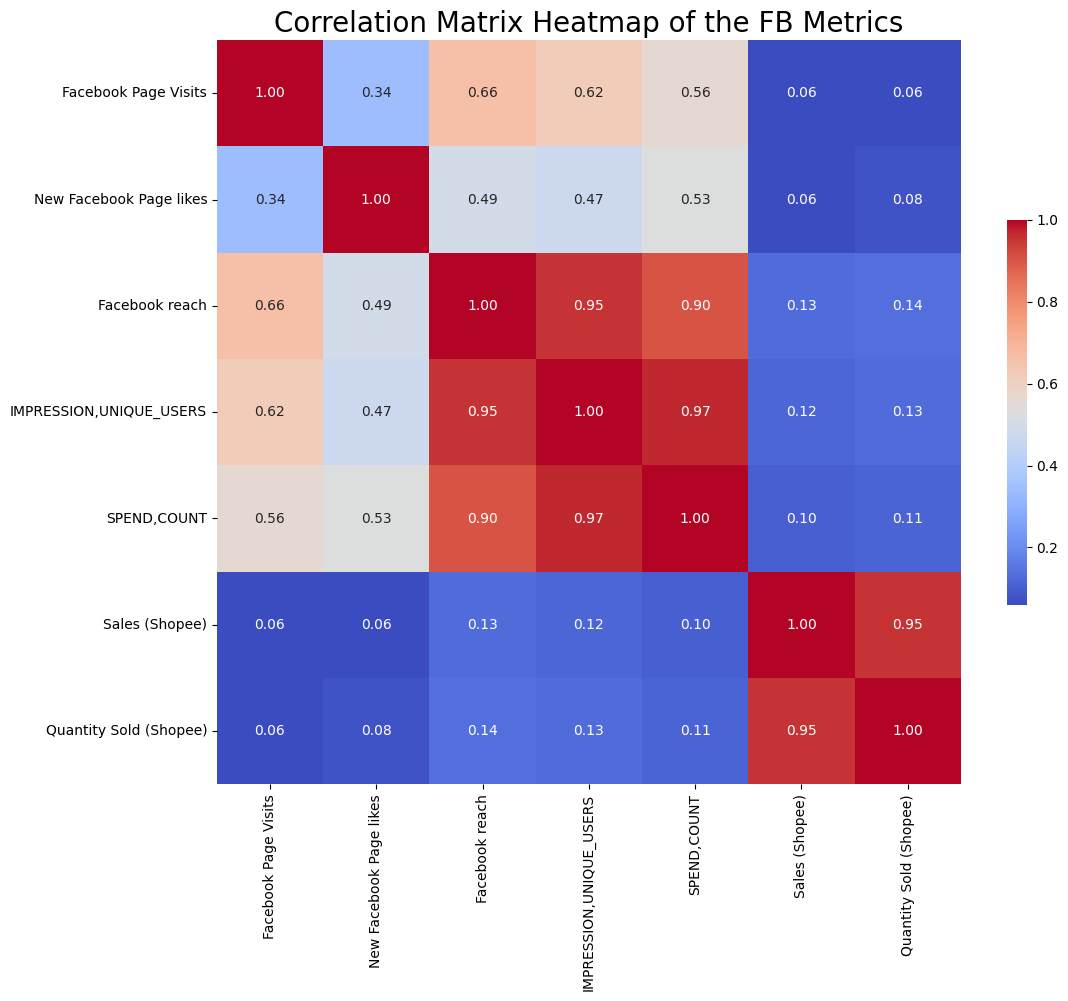

In [101]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap of the FB Metrics', fontsize=20)
plt.show()

The heatmap suggests that Facebook metrics like page visits, reach, and ad impressions are closely linked to each other—when one goes up, the others tend to as well. Notably, spending on ads is strongly related to an increase in reach and impressions. However, these Facebook activities don't show a strong direct relationship with Shopee sales or the quantity of products sold, which implies that more activity or visibility on Facebook doesn't necessarily translate to immediate sales on Shopee.

The Mann-Whitney test performed earlier indicated that there is a statistically significant difference in Shopee sales on days with paid Facebook ads compared to days without. This suggests that while the correlation heatmap doesn't show a strong linear relationship between Facebook ad spend and Shopee sales, the presence of paid ads does have a positive impact on sales, meaning, that the relationship between ad spend and sales is not linear or is influenced by other factors not captured in a simple correlation. Maybe, it could be that ads contribute to brand awareness or product discovery, which then indirectly leads to sales over time, rather than immediately. The Mann-Whitney test captures these differences even when they are not linear, which might explain this discrepancy observed between the correlation matrix and the results of the significance testing.

In [134]:
fb['Date'] = pd.to_datetime(fb['Date'])
fb['Day of Week'] = fb['Date'].dt.dayofweek
fb['Day of Week'] = fb['Day of Week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

sales_by_day = fb.groupby('Day of Week')['Sales (Shopee)'].agg(['mean', 'sem'])
sorted_sales_by_day = sales_by_day.sort_values(by= 'mean',ascending=False)
sorted_sales_by_day.reset_index(inplace=True)

In [135]:
sorted_sales_by_day.head()

,Day of Week,mean,sem
0,Monday,790.387755,122.097714
1,Wednesday,656.775510,88.570818
2,Tuesday,592.829932,60.562720
3,Friday,534.693878,87.194231
4,Thursday,524.537415,61.905338


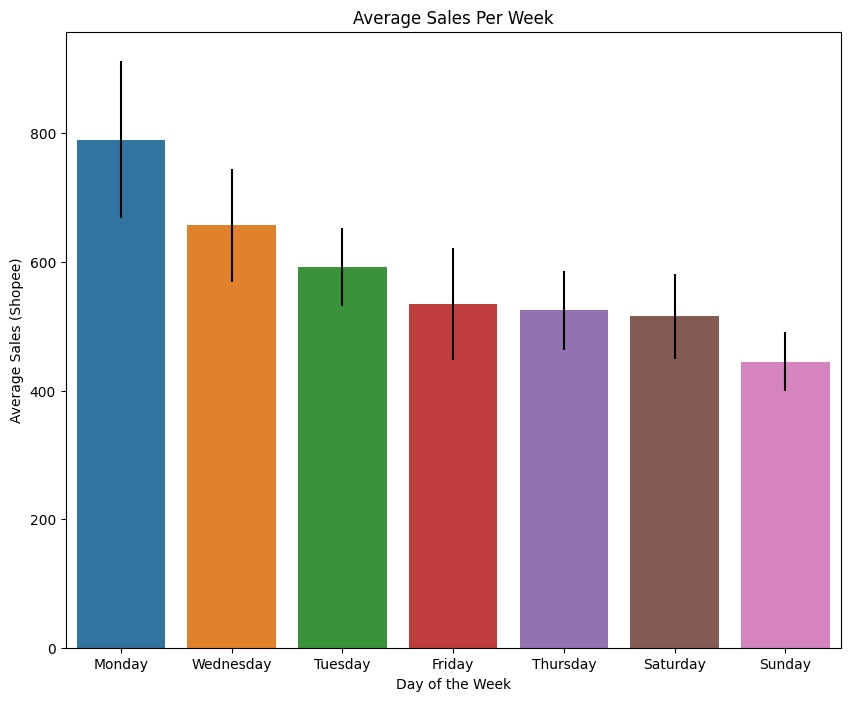

In [136]:
plt.figure(figsize=(10,8))
sns.barplot(x='Day of Week', y='mean', data=sorted_sales_by_day, yerr=sorted_sales_by_day['sem'], capsize=0.1)
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales (Shopee)')
plt.title('Average Sales Per Week')
plt.show()

Based on the graph it looks like Mondays typically have the highest sales in a week and it starts to lower every day till Sunday which is the lowest.

## Engagement Ratio, Incremental Growth Rate, and Reach Efficiency of Paid Ads

I will be analyzing this metric next. But first, I will create the metrics in the dataset.

In [152]:
average_engagement_by_day = fb.groupby('Day of Week')['Engagement Ratio'].mean().reset_index()
average_engagement_by_day = average_engagement_by_day.sort_values('Engagement Ratio', ascending=False)

In [138]:
#Convert zeros to nan to avoid zero division
fb['Facebook reach'].replace(0, np.nan, inplace=True)
fb['SPEND,COUNT'].replace(0, np.nan, inplace=True)

In [139]:
# Engagement Ratio
fb['Total Engagement'] = fb['Facebook Page Visits'] + fb['New Facebook Page likes']
fb['Engagement Ratio'] = fb['Total Engagement'] / fb['Facebook reach']

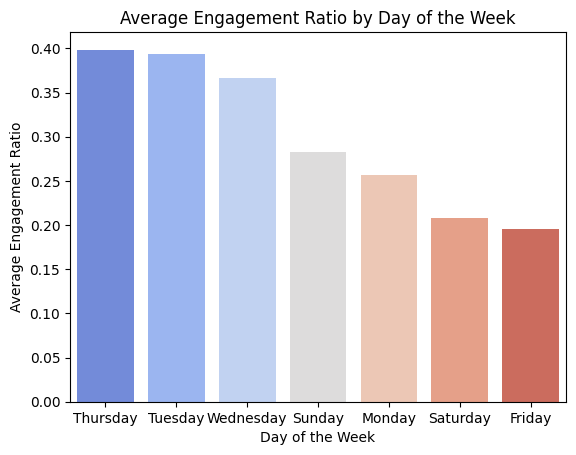

In [153]:
sns.barplot(x='Day of Week', y='Engagement Ratio', data=average_engagement_by_day, palette='coolwarm')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagement Ratio')
plt.title('Average Engagement Ratio by Day of the Week')
plt.show()

In [158]:
# Incremental Growth Analysis
fb['Likes Growth Rate'] = fb['New Facebook Page likes'].pct_change() * 100
fb['Reach Growth Rate'] = fb['Facebook reach'].pct_change() * 100

In [144]:
# Reach Efficiency for Paid Ads
fb['Reach Efficiency'] = fb['Facebook reach'] / fb['SPEND,COUNT']

In [149]:
fb.head()

,Date,Facebook Page Visits,New Facebook Page likes,Facebook reach,"IMPRESSION,UNIQUE_USERS","SPEND,COUNT",Sales (Shopee),Quantity Sold (Shopee),Day of Week,Total Engagement,Engagement Ratio,Likes Growth Rate,Reach Growth Rate,Sales Growth Rate,Reach Efficiency
0,2021-01-09,0,0,NaN,0,NaN,0,0,Saturday,0,NaN,NaN,NaN,NaN,NaN
1,2021-01-10,0,0,NaN,0,NaN,2300,64,Sunday,0,NaN,NaN,NaN,inf,NaN
2,2021-01-11,0,0,NaN,0,NaN,150,3,Monday,0,NaN,NaN,NaN,-93.478261,NaN
3,2021-01-12,0,0,NaN,0,NaN,0,0,Tuesday,0,NaN,NaN,NaN,-100.000000,NaN
4,2021-01-13,0,0,NaN,0,NaN,100,2,Wednesday,0,NaN,NaN,NaN,inf,NaN


In [155]:
fb.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Facebook Page Visits,New Facebook Page likes,Facebook reach,"IMPRESSION,UNIQUE_USERS","SPEND,COUNT",Sales (Shopee),Quantity Sold (Shopee),Total Engagement,Engagement Ratio,Likes Growth Rate,Reach Growth Rate,Sales Growth Rate,Reach Efficiency
count,1031.000000,1031.000000,705.000000,1031.000000,43.000000,1031.000000,1031.000000,1031.000000,705.000000,102.0,730.000000,940.000000,27.000000
mean,1.215325,0.099903,214.188652,167.229874,122.854884,579.723569,11.553831,1.315228,0.299725,inf,56.390640,inf,38.200507
std,3.636679,0.741757,1061.601003,909.998932,56.066463,967.301135,24.115595,3.949260,0.875596,NaN,345.450794,NaN,11.124745
min,0.000000,0.000000,1.000000,0.000000,1.670000,0.000000,0.000000,0.000000,0.000000,-100.0,-99.649246,-100.000000,22.406784
25%,0.000000,0.000000,3.000000,0.000000,82.625000,50.000000,1.000000,0.000000,0.000000,-100.0,-37.500000,-79.800973,33.153404
50%,0.000000,0.000000,4.000000,0.000000,145.890000,300.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,37.777472
75%,1.000000,0.000000,9.000000,0.000000,151.665000,700.000000,12.000000,1.000000,0.222222,NaN,66.046293,384.660714,41.130833
max,65.000000,19.000000,6858.000000,6872.000000,257.890000,15000.000000,500.000000,70.000000,11.000000,inf,5600.000000,inf,85.000000


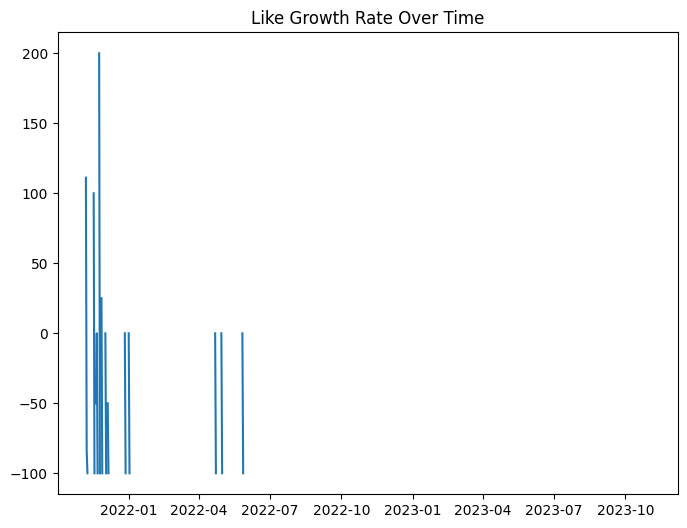

In [147]:
plt.figure(figsize=(8, 6))
plt.plot(fb['Date'], fb['Likes Growth Rate'], label='Likes Growth Rate')
plt.title('Like Growth Rate Over Time')
plt.show()

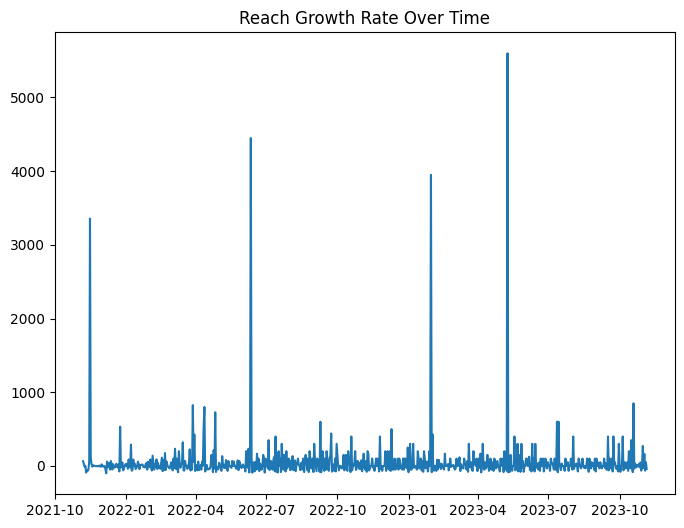

In [148]:
plt.figure(figsize=(8, 6))
plt.plot(fb['Date'], fb['Reach Growth Rate'], label='Reach Growth Rate')
plt.title('Reach Growth Rate Over Time')
plt.show()

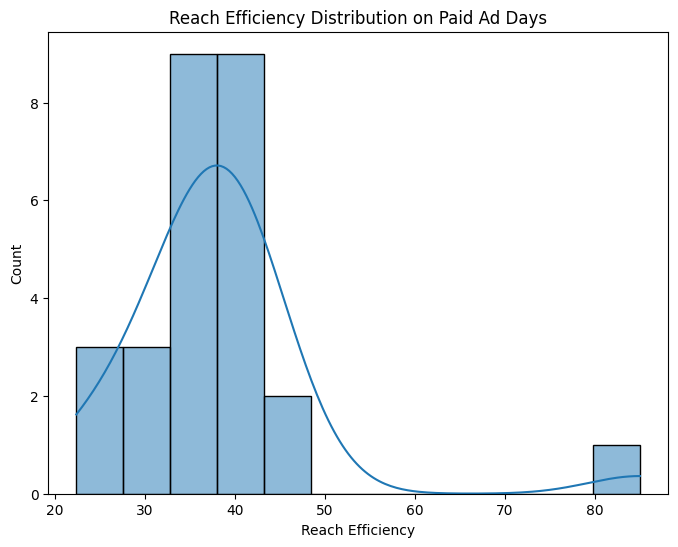

In [154]:
# Plotting Reach Efficiency
df_with_ads = fb.dropna(subset=['SPEND,COUNT', 'Reach Efficiency'])
plt.figure(figsize=(8, 6))
sns.histplot(df_with_ads['Reach Efficiency'], kde=True)
plt.title('Reach Efficiency Distribution on Paid Ad Days')
plt.show()

### Here are the results of the analysis:

* **Engagement Ratio by Day of the Week**: The bar chart shows the average engagement ratio for each day of the week. It appears that midweek days like Thursday, Tuesday, and Wednesday have the highest average engagement ratios, indicating that these may be the best days to post content or run ads to maximize engagement. The weekend days, particularly Saturday, and the beginning of the week, like Monday, show lower engagement ratios.
---

* **Like Growth Rate Over Time**: The line graph indicates significant fluctuations in the growth rate of likes over time. There are sharp spikes, both positive and negative, suggesting periods of rapid increase in likes as well as periods where likes may have decreased just as quickly. This maybe due to the paid ads for the Page.
---

* **Reach Growth Rate Over Time**: This line graph also shows volatility, with some extremely high peaks that represent substantial growth in reach on certain days. These peaks may coincide with specific campaigns or content that had wide visibility.
---

* **Reach Efficiency Distribution on Paid Ad Days**: The histogram displays the distribution of the reach efficiency metric, which is the reach per pesos spent on ads. Most of the data points are clustered around a certain range, with a few outliers that have very high reach efficiency (max 5600%). This points to certain ad campaigns that were particularly successful in terms of reach relative to the amount spent.
> In checking my FB Page metrics for the 4 Highly Effective posts, two of the highly successful campaigns were from my Product Specific Ads (Acapulco and Citronella), one is an AI-created blog post for Acapulco and one is an AI-Generated video for Acapulco - Very interesting findings.

# **Concluding Thoughts**

This project embarked on a detailed exploration of the performance metrics of my Facebook page, "Handmade Herbal Soap," primarily focusing on understanding the impact of paid advertisements on various metrics like page visits, likes, reach, and their correlation with sales and traffic on Shopee. Utilizing a data-driven approach, the analysis revealed several crucial insights:

* Engagement Patterns and Optimal Timing: The analysis demonstrated that midweek days (Tuesday, Wednesday, and Thursday) have the highest average engagement ratios on the Facebook page. This suggests that these days are most effective for posting content or running ads to maximize user engagement. Conversely, the weekend and Monday showed lower engagement, guiding strategic planning for content dissemination. So I will keep that in mind.

* Fluctuations in Likes and Reach: There were significant fluctuations in the growth rate of page likes and reach, indicating varying effectiveness of different ad campaigns and content. Also I tend to not promote likes to the page.

* Efficiency of Paid Advertisements: The study employed statistical techniques, including the Mann Whitney U test and bootstrapping, to rigorously analyze the impact of paid ads. The results indicated a noticeable difference in engagement and sales metrics with and without ads.

* The reach efficiency metric, which measures reach per unit of ad spend, showed that certain ad campaigns, Specifically for Acapulco and also, especially those involving AI-generated content like blog posts and videos, were highly efficient in terms of reach relative to the amount spent.

* Impact on Sales and Product Quantity Sold: The project also shed light on the correlation between Facebook ad campaigns and sales performance on Shopee. The data suggested that effective Facebook advertising could positively impact online sales and product quantity sold, underlining the importance of integrated digital marketing strategies.

*In conclusion, this project underscores the significance of strategic timing and content optimization in my social media marketing. The fluctuations in likes and reach growth rates emphasize the need for continual adjustment and evaluation of marketing strategies. Also, the effectiveness of AI-generated content in my paid ads offers an innovative avenue for enhancing online engagement and sales. These insights are invaluable for shaping future marketing initiatives, ensuring they are data-driven, targeted, and tailored for maximum impact of my products.*
---

---

This project was a fun one since I get to have deeper insights for my business strategy moving forward and this analysis also expanded from my insights from my Shopee metrics analysis, reinforcing some insights there and gaining new insights that I would not have thought of had I not done an analysis here.
---

# **TL;DR:**

#### This Facebook Page Data Analytics Project revealed that midweek is optimal for engagement, paid ads significantly impact page metrics and sales on Shopee, with AI-generated content showing high efficiency in ad campaigns. The analysis highlights the importance of strategic content timing and continual strategy adjustment for effective social media marketing.